Coefficient or slope: [2.48688167]
Intercept: 69.017906947512
2.0312205744083185
1.1415392186334892
1.4252089581560727
0.7427361627890559


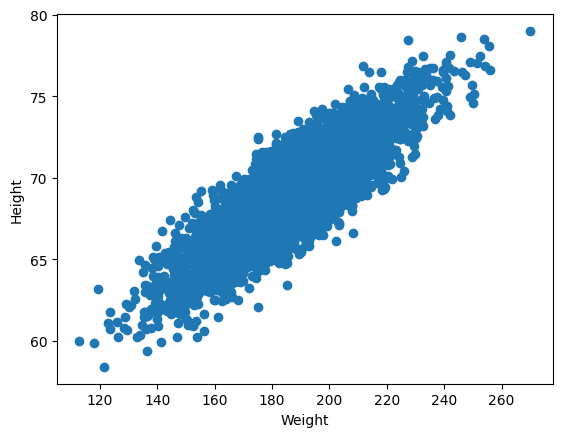

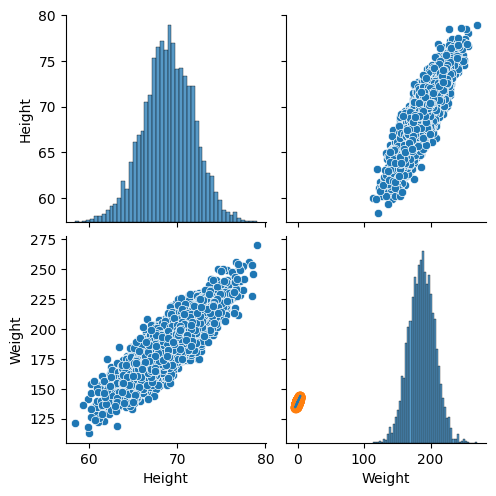

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 18 06:00:23 2024

@author: admin
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('height-weight.csv')
df.head()
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
## Correlation
df.corr()
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)
## Independent and dependent features
X=df[['Weight']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Height'] ## this variiable can be in series or 1d array
X_series=df['Weight']
np.array(X_series).shape
np.array(y).shape
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
y_pred=regression.predict(X_test)
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

Coefficients of Linear Regression: [-46.61073415  18.97827545]


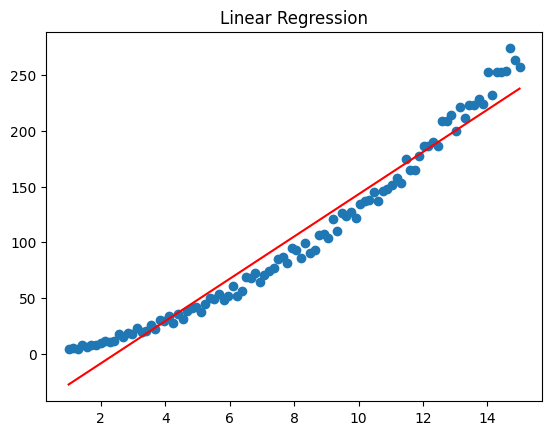

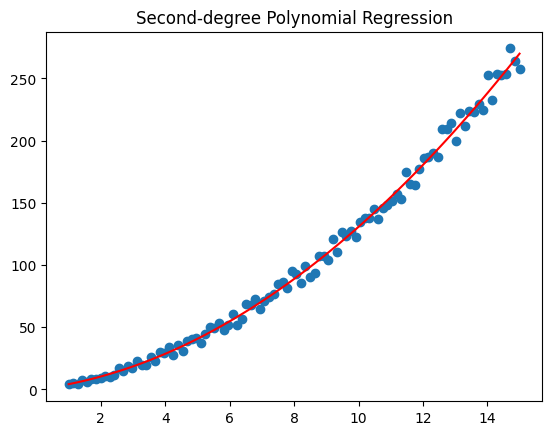

Coefficients of Second-degree Polynomial Regression: [0.03318335 3.2124389  0.98536478]
Intercept of Second-degree Polynomial Regression: 0.033183352906922536
Slope: 18.865708057775077
Intercept: -47.10077741766554
Coefficients of Second-degree Polynomial Regression:
Coefficients: [0.         3.02440723 0.9900813 ]
Intercept: -0.2335955382847601


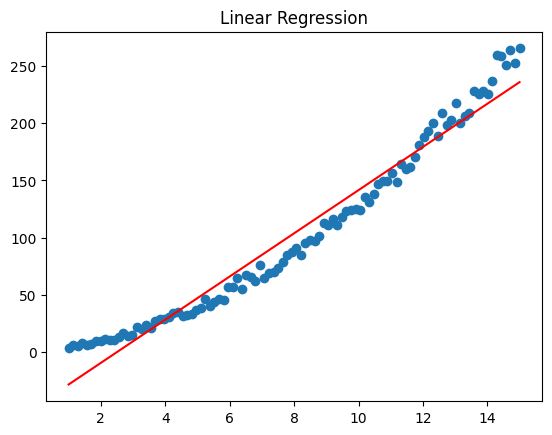

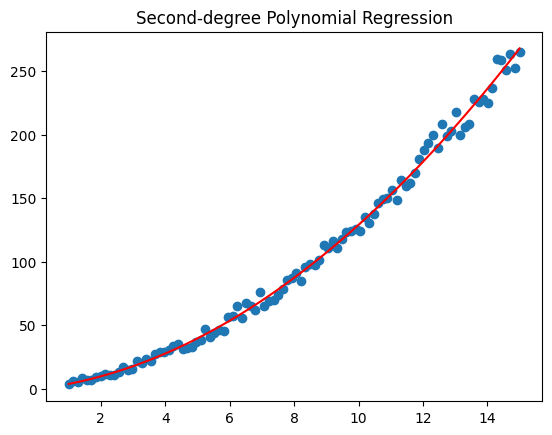

In [9]:
# -*- coding: utf-8 -*-

"""
Created on Thu Jan 11 06:43:15 2024

@author: admin
"""
#Comapre two methods of linear regression 
import numpy as np
import matplotlib.pyplot as plt
# simple linear regression using solving set of equations and to find the co-efficients directly
# Generate the synthetic data
x = np.linspace(1, 15, 100)
y = 2*x + (x + np.random.rand(len(x)))**2
# suppose if your x and y values are given in tablur format then instead of simulated data replace those values with x and y 
# Linear Regression
X_linear = np.vstack((np.ones_like(x), x))
b_linear = np.linalg.pinv(X_linear.T) @ y
plt.figure(1)
plt.scatter(x, y)
plt.plot(x, X_linear.T @ b_linear, color='r')
plt.title('Linear Regression')
print("Coefficients of Linear Regression:", b_linear)

# Second-degree Polynomial Regression
X_poly2 = np.vstack((np.ones_like(x), x, x**2))
b_poly2 = np.linalg.pinv(X_poly2.T) @ y
plt.figure(2)
plt.scatter(x, y)
plt.plot(x, X_poly2.T @ b_poly2, color='r')
plt.title('Second-degree Polynomial Regression')
plt.show()
print("Coefficients of Second-degree Polynomial Regression:", b_poly2)
intercept_poly2 = b_poly2[0]
print("Intercept of Second-degree Polynomial Regression:", intercept_poly2)
# simple linear regression using solving set of equations and to find the co-efficients using LR ML model for python 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# PolynomialFeatures class in scikit-learn is used for feature engineering in polynomial regression. 
# It generates polynomial features based on the input data, allowing you to capture nonlinear relationships in your model
# Given data
x = np.linspace(1, 15, 100)
y = 2 * x + (x + np.random.rand(len(x)))**2

# Linear Regression
X_linear = x.reshape(-1, 1)
model_linear = LinearRegression().fit(X_linear, y)
print("Slope:", model_linear.coef_[0])
print("Intercept:", model_linear.intercept_)
plt.figure(1)
plt.scatter(x, y)
plt.plot(x, model_linear.predict(X_linear), color='r')
plt.title('Linear Regression')


# Second-degree Polynomial Regression
X_poly2 = x.reshape(-1, 1)
model_poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_poly2.fit(X_poly2, y)

# Accessing coefficients
linear_regression_coef = model_poly2.steps[-1][1].coef_
intercept = model_poly2.steps[-1][1].intercept_
print("Coefficients of Second-degree Polynomial Regression:")
print("Coefficients:", linear_regression_coef)
print("Intercept:", intercept)

plt.figure(2)
plt.scatter(x, y)
plt.plot(x, model_poly2.predict(X_poly2), color='r')
plt.title('Second-degree Polynomial Regression')
plt.show()
